<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/SFH_v2/NGC6822_SFH_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1122, done.
remote: Counting objects: 100% (457/457), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 1122 (delta 243), reused 362 (delta 208), pack-reused 665
Receiving objects: 100% (1122/1122), 94.05 MiB | 24.50 MiB/s, done.
Resolving deltas: 100% (523/523), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import math
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [53]:
def Ellipse(x,a,b):
  '''
   a: semi-major axis
   b: semi-minor axis
  '''
  y = b * ((1 - ((x/a)**2) )**0.5)
  return y

In [54]:
Z = 0.01
Z_name = ''.join(list(str(Z))[2:])

# Data Preparing

In [55]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

Ra_center = 296.23 #degree
Dec_center = -14.80167 #degree

Distance = 500 #Kpc
a_bulge = 0.560 #Kpc
b_nulge = 0.727 #Kpc
R_body = 1.4 #Kpc

S_bulge = np.pi * a_bulge * b_nulge # Kpc^2
S_body  = np.pi * (R_body**2) - S_bulge  # Kpc^2

In [56]:
df_loc = pd.read_csv('/content/NGC_6822/Data/Data_location.csv')

In [57]:
df = pd.read_csv('/content/NGC_6822/Data_Correction_v2/NGC6822_LPV_Data_'+Z_name+'.csv')

In [58]:
df = df.merge(df_loc, how='inner', on = ['Ra(J2000) deg','Dec(J2000) deg'])

Sorting By t (Age of LPV Stras)

In [59]:
df = df.sort_values(by='t', ascending=False)
df = df.reset_index()

In [60]:
df

,index,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt,Wyder,Bulge,Body
0,148,89.99,296.204498,-14.674287,18.120,17.210,C,0.129911,0.910,-0.134160,0.734243,10.429825,2.690450e+10,4.837007,68707.920751,0,0,1
1,186,89.99,296.333038,-14.770712,18.040,17.180,C,0.107588,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,72267.610348,1,0,1
2,372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.122540,0.754154,10.391990,2.465984e+10,4.888467,77351.227365,0,0,0
3,265,89.99,296.199615,-14.780900,18.214,17.131,C,0.036805,1.083,-0.121046,0.756753,10.387126,2.438517e+10,4.895151,78550.951810,0,1,0
4,352,89.99,296.281311,-14.863727,18.271,17.109,C,0.080523,1.162,-0.117394,0.763143,10.375235,2.372656e+10,4.911552,81574.107128,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.797300,6.270469,7.823534,6.660923e+07,4.139798,13797.422306,1,1,0
373,373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,0.984940,9.659174,7.453891,2.843748e+07,4.878981,75679.917673,1,1,0
374,375,20022.00,296.208160,-14.726160,13.890,12.760,s,0.078605,1.130,1.028690,10.682921,7.372866,2.359751e+07,5.207545,161266.765725,0,1,0
375,376,40397.00,296.243010,-14.746520,13.900,12.920,s,0.056664,0.980,1.089010,12.274675,7.072726,1.182295e+07,5.265843,184434.770965,1,1,0


In [61]:
df['alpha'] = np.nan
for i in df.index:
  if df.loc[i,'M/Ms'] < 0.08 :
     df.loc[i,'alpha'] = 0.3
  elif df.loc[i,'M/Ms'] >= 0.5 :
     df.loc[i,'alpha'] = 2.3
  else :
     df.loc[i,'alpha'] = 1.3  

(array([  0.,   0.,   0.,   0.,   0., 377.,   0.,   0.,   0.,   0.]),
 array([1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8]),
 <BarContainer object of 10 artists>)

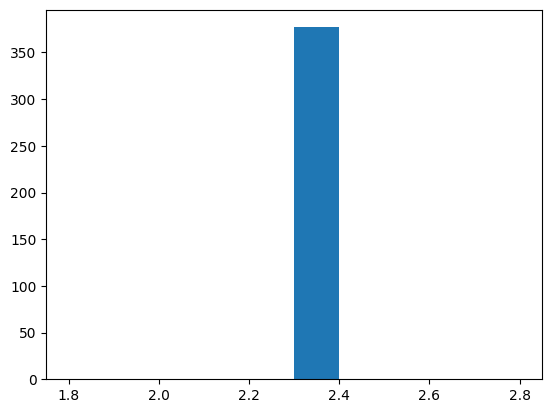

In [62]:
plt.hist(df['alpha'])

# Whole Region

In [63]:
df

,index,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt,Wyder,Bulge,Body,alpha
0,148,89.99,296.204498,-14.674287,18.120,17.210,C,0.129911,0.910,-0.134160,0.734243,10.429825,2.690450e+10,4.837007,68707.920751,0,0,1,2.3
1,186,89.99,296.333038,-14.770712,18.040,17.180,C,0.107588,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,72267.610348,1,0,1,2.3
2,372,89.99,296.003693,-14.974893,18.192,17.140,C,0.284993,1.052,-0.122540,0.754154,10.391990,2.465984e+10,4.888467,77351.227365,0,0,0,2.3
3,265,89.99,296.199615,-14.780900,18.214,17.131,C,0.036805,1.083,-0.121046,0.756753,10.387126,2.438517e+10,4.895151,78550.951810,0,1,0,2.3
4,352,89.99,296.281311,-14.863727,18.271,17.109,C,0.080523,1.162,-0.117394,0.763143,10.375235,2.372656e+10,4.911552,81574.107128,0,0,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.797300,6.270469,7.823534,6.660923e+07,4.139798,13797.422306,1,1,0,2.3
373,373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,0.984940,9.659174,7.453891,2.843748e+07,4.878981,75679.917673,1,1,0,2.3
374,375,20022.00,296.208160,-14.726160,13.890,12.760,s,0.078605,1.130,1.028690,10.682921,7.372866,2.359751e+07,5.207545,161266.765725,0,1,0,2.3
375,376,40397.00,296.243010,-14.746520,13.900,12.920,s,0.056664,0.980,1.089010,12.274675,7.072726,1.182295e+07,5.265843,184434.770965,1,1,0,2.3


In [64]:
bins_number = 19
bins_with_less_stars = 2
bins_pop = ([19]*(bins_number-bins_with_less_stars)) + ([18]*bins_with_less_stars) + ( [6] * 2 ) + ( [3] * 2)
print(sum(bins_pop))

377


In [65]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df[lower_index:lower_index+i]

  # Calculating limitation of each bin 
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
  
  XI_ = p1 * p2 * (1/p3) * 1000
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

In [66]:
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
           'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
           'Mean log(t) error' , 'XI' , 'XI error'] 
# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                               M_lower_limit,M_upper_limit,alpha,log_t,
                               log_t_err,XI,XI_err)), columns =columns)

In [67]:
SFH_df

,log(t) (lower limit),log(t) (upper limit),M (lower limit),M (upper limit),Alpha,Mean log(t),Mean log(t) error,XI,XI error
0,10.244435,10.429825,0.734243,0.837101,2.3,10.337130,0.092695,4.690010,1.075962
1,10.087691,10.235246,0.842558,0.935229,2.3,10.161469,0.073778,3.694545,0.847587
2,9.997428,10.087150,0.935587,0.996873,2.3,10.042289,0.044861,4.636273,1.063634
3,9.923921,9.992023,1.000691,1.050065,2.3,9.957972,0.034051,5.182497,1.188946
4,9.873179,9.918893,1.053804,1.088429,2.3,9.896036,0.022857,6.638942,1.523078
5,9.837624,9.872163,1.089211,1.116143,2.3,9.854894,0.017270,7.951074,1.824101
6,9.797497,9.837624,1.116143,1.148270,2.3,9.817560,0.020063,6.231114,1.429516
7,9.764481,9.796989,1.148682,1.175395,2.3,9.780735,0.016254,7.155936,1.641684
8,9.727142,9.763973,1.175818,1.206845,2.3,9.745558,0.018415,5.885011,1.350114
9,9.678211,9.722406,1.210895,1.249338,2.3,9.700308,0.022098,4.451786,1.021310


<ipython-input-68-45ae9d298891>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


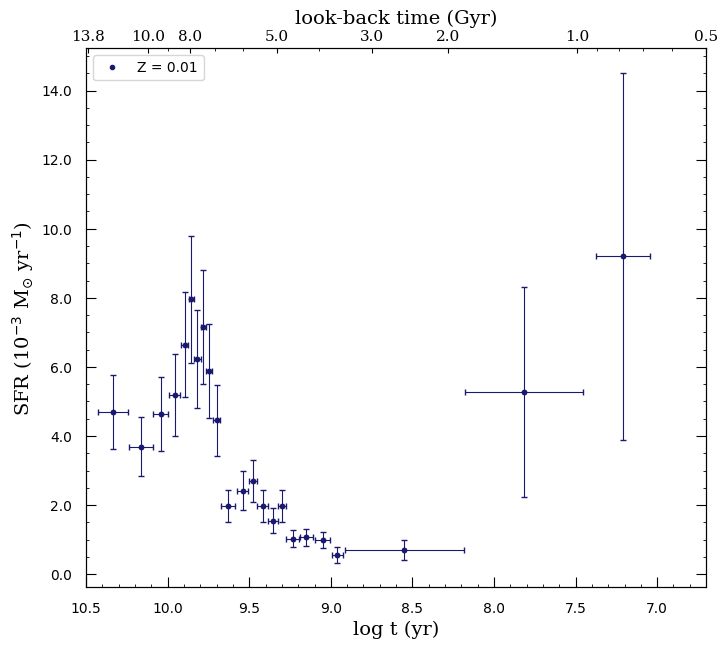

In [68]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (10$^{-3}$ M$_{\odot}$ yr$^{-1}$)',
           {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(10.5,6.7)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
             SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

Saving Data 

In [69]:
SFH_df.to_csv('NGC6822_SFH_Data_'+ Z_name +'.csv', index=False)

# Bulge ( a = 3.85 arcmin = 0.06416667 degree, b = 5 arcmin = 0.0833333 degree )

In [70]:
df_bulge = df[df['Bulge'] == 1 ]

In [71]:
df_bulge

,index,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt,Wyder,Bulge,Body,alpha
3,265,89.99,296.199615,-14.780900,18.214,17.131,C,0.036805,1.083,-0.121046,0.756753,10.387126,2.438517e+10,4.895151,78550.951810,0,1,0,2.3
5,95,89.99,296.220330,-14.728410,18.060,17.080,C,0.073895,0.980,-0.112580,0.771649,10.359560,2.288550e+10,4.933301,85763.135262,0,1,0,2.3
7,34,12557.00,296.183980,-14.780180,18.030,17.050,O,0.050790,0.980,-0.107600,0.780549,10.343346,2.204680e+10,4.955946,90353.639071,0,1,0,2.3
12,343,89.99,296.264984,-14.824442,18.174,16.991,C,0.041743,1.183,-0.097806,0.798351,10.311456,2.048596e+10,5.000882,100203.381571,0,1,0,2.3
15,149,89.99,296.247101,-14.722958,17.930,16.960,C,0.080548,0.970,-0.092660,0.807867,10.294701,1.971065e+10,5.024688,105849.269080,1,1,0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,374,10074.00,296.240050,-14.807960,14.540,13.590,s,0.011856,0.950,0.797300,6.270469,7.823534,6.660923e+07,4.139798,13797.422306,1,1,0,2.3
373,373,10032.00,296.226960,-14.801910,14.280,13.270,s,0.003049,1.010,0.984940,9.659174,7.453891,2.843748e+07,4.878981,75679.917673,1,1,0,2.3
374,375,20022.00,296.208160,-14.726160,13.890,12.760,s,0.078605,1.130,1.028690,10.682921,7.372866,2.359751e+07,5.207545,161266.765725,0,1,0,2.3
375,376,40397.00,296.243010,-14.746520,13.900,12.920,s,0.056664,0.980,1.089010,12.274675,7.072726,1.182295e+07,5.265843,184434.770965,1,1,0,2.3


In [72]:
bins_number = 11
bins_with_less_stars = 0
bins_pop = ([11]*(bins_number-bins_with_less_stars)) + ([10]*bins_with_less_stars) + ([4]) + ( [3] * 2 )
print(sum(bins_pop))

131


In [73]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df_bulge[lower_index:lower_index+i]

  # Calculating limitation of each bin 
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
  
  XI_ = p1 * p2 * (1/p3) / S_bulge * 1000
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

In [74]:
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
           'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
           'Mean log(t) error' , 'XI' , 'XI error'] 
# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                               M_lower_limit,M_upper_limit,alpha,log_t,
                               log_t_err,XI,XI_err)), columns =columns)

In [75]:
SFH_df

,log(t) (lower limit),log(t) (upper limit),M (lower limit),M (upper limit),Alpha,Mean log(t),Mean log(t) error,XI,XI error
0,10.116337,10.387126,0.756753,0.916474,2.3,10.251732,0.135394,1.216928,0.366918
1,9.986618,10.110932,0.919983,1.004523,2.3,10.048775,0.062157,1.610777,0.485668
2,9.873179,9.981213,1.008370,1.088429,2.3,9.927196,0.054017,1.357366,0.409261
3,9.798005,9.873179,1.088429,1.147858,2.3,9.835592,0.037587,1.625396,0.490075
4,9.751275,9.793100,1.151846,1.186424,2.3,9.772187,0.020913,2.481970,0.748342
5,9.646275,9.741116,1.194978,1.277874,2.3,9.693695,0.047420,0.968444,0.291997
6,9.494363,9.622786,1.299278,1.422800,2.3,9.558575,0.064212,0.551890,0.166401
7,9.376201,9.487221,1.430005,1.554891,2.3,9.431711,0.055510,0.501068,0.151078
8,9.315888,9.371981,1.560989,1.644372,2.3,9.343935,0.028047,0.730744,0.220328
9,9.213915,9.312576,1.649433,1.807529,2.3,9.263245,0.049330,0.389747,0.117513


<ipython-input-76-c460344c61b7>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


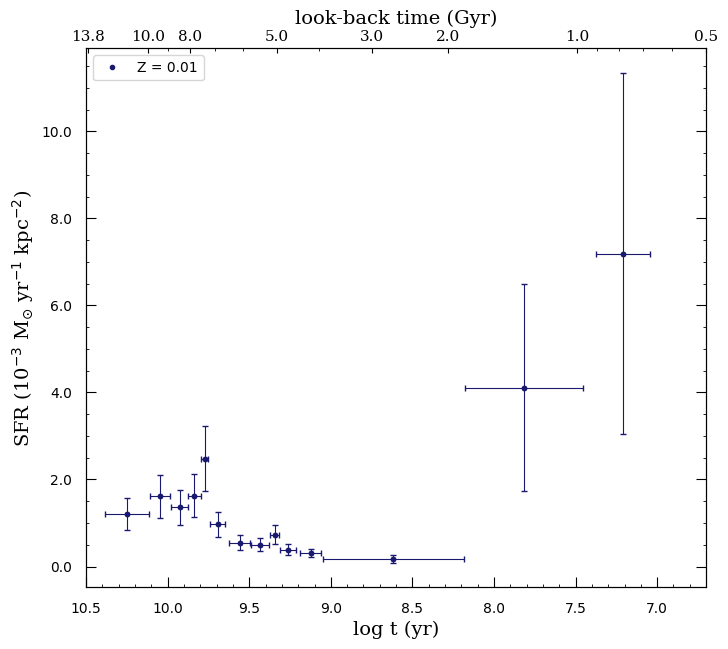

In [76]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (10$^{-3}$ M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$)',
           {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(10.5,6.7)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
             SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################

plt.savefig('SFR_Bulge_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

Saving Data 

In [77]:
SFH_df.to_csv('NGC6822_SFH_Data_Bulge_'+ Z_name +'.csv', index=False)

# Bulge _ Optical Body Radius  ( Ellipse < R < 1.4 Kpc ) 

In [78]:
df_body = df[df['Body'] == 1]

In [79]:
df_body

,index,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt,Wyder,Bulge,Body,alpha
0,148,89.99,296.204498,-14.674287,18.120,17.210000,C,0.129911,0.910,-0.134160,0.734243,10.429825,2.690450e+10,4.837007,6.870792e+04,0,0,1,2.3
1,186,89.99,296.333038,-14.770712,18.040,17.180000,C,0.107588,0.860,-0.129180,0.742711,10.413610,2.591851e+10,4.858944,7.226761e+04,1,0,1,2.3
4,352,89.99,296.281311,-14.863727,18.271,17.109000,C,0.080523,1.162,-0.117394,0.763143,10.375235,2.372656e+10,4.911552,8.157411e+04,0,0,1,2.3
6,280,89.99,296.275116,-14.926181,18.121,17.053000,C,0.132433,1.068,-0.108098,0.779654,10.344967,2.212927e+10,4.953675,8.988240e+04,0,0,1,2.3
9,173,89.99,296.335388,-14.681108,18.190,17.030000,C,0.160131,1.160,-0.104280,0.786539,10.332536,2.150481e+10,4.971121,9.356662e+04,0,0,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,234,89.99,296.126917,-14.789750,16.794,14.868561,C,0.103770,1.698,0.368780,2.337655,8.936687,8.643452e+08,6.300813,1.999000e+06,1,0,1,2.3
365,355,89.99,296.262299,-14.882443,16.154,14.835000,C,0.086991,1.319,0.378580,2.391002,8.912364,8.172679e+08,6.280017,1.905537e+06,0,0,1,2.3
366,7,10293.00,296.299220,-14.836500,17.670,14.644853,LAV,0.077489,1.698,0.442110,2.767644,8.740354,5.499892e+08,6.059003,1.145520e+06,0,0,1,2.3
367,42,30292.00,296.188010,-14.872310,15.680,14.610000,O,0.082178,1.070,0.456400,2.860224,8.699414,5.005114e+08,5.990416,9.781734e+05,0,0,1,2.3


In [80]:
bins_number = 12
bins_with_more_stars = 1
bins_pop = ([12]*(bins_number-bins_with_more_stars)) + ([11]*bins_with_more_stars) + ([5]) + ([3]*2)
print(sum(bins_pop))

154


In [81]:
lower_index = 0
sub_integration = integrate.quad(lambda m: m * m**-0.3 , 0.02, 0.08)[0] \
                  + integrate.quad(lambda m: m * m**-1.3 , 0.08, 0.5)[0] \
                    + integrate.quad(lambda m: m * m**-2.3 , 0.5, 200)[0]

log_t = []
log_t_err = []

XI = []
XI_err = []

alpha =[]
M_lower_limit = []
M_upper_limit = []
log_t_lower_limit = []
log_t_upper_limit = []

for i in bins_pop :

  selected_df = df_body[lower_index:lower_index+i]

  # Calculating limitation of each bin 
  M_lower_limit_ = selected_df.iloc[0]['M/Ms']
  M_upper_limit_ = selected_df.iloc[-1]['M/Ms']
  alpha_ = selected_df.iloc[0]['alpha']
  log_t_lower_limit_ = selected_df.iloc[-1]['Log(t)']
  log_t_upper_limit_ = selected_df.iloc[0]['Log(t)']

  # Adding to lists
  alpha.append(alpha_)
  M_lower_limit.append(M_lower_limit_)
  M_upper_limit.append(M_upper_limit_)
  log_t_lower_limit.append(log_t_lower_limit_)
  log_t_upper_limit.append(log_t_upper_limit_)

  # Calculating XI
  p1 = sum(1/selected_df['dt'])
  p2 = sub_integration
  p3 , err = integrate.quad(lambda m: m**(-alpha_) , M_lower_limit_, M_upper_limit_)
  
  XI_ = p1 * p2 * (1/p3) / S_body * 1000
  XI_err_ = XI_ * ((i**0.5)/i) 

  log_t.append((log_t_lower_limit_ + log_t_upper_limit_)/2)
  log_t_err.append((log_t_upper_limit_ - log_t_lower_limit_ )/2)
  XI.append(XI_)
  XI_err.append(XI_err_)

  lower_index += i

In [82]:
columns = ['log(t) (lower limit)' , 'log(t) (upper limit)',
           'M (lower limit)', 'M (upper limit)' , 'Alpha' , 'Mean log(t)',
           'Mean log(t) error' , 'XI' , 'XI error'] 
# Calling DataFrame constructor after zipping
# both lists, with columns specified
SFH_df = pd.DataFrame(list(zip(log_t_lower_limit, log_t_upper_limit,
                               M_lower_limit,M_upper_limit,alpha,log_t,
                               log_t_err,XI,XI_err)), columns =columns)

In [83]:
SFH_df

,log(t) (lower limit),log(t) (upper limit),M (lower limit),M (upper limit),Alpha,Mean log(t),Mean log(t) error,XI,XI error
0,10.154172,10.429825,0.734243,0.892278,2.3,10.291998,0.137826,0.377657,0.109020
1,9.959593,10.127147,0.909494,1.023906,2.3,10.043370,0.083777,0.322940,0.093225
2,9.863020,9.948784,1.031763,1.096276,2.3,9.905902,0.042882,0.464070,0.133965
3,9.809991,9.857941,1.100221,1.138169,2.3,9.833966,0.023975,0.704665,0.203419
4,9.771592,9.806640,1.140870,1.169499,2.3,9.789116,0.017524,0.873272,0.252092
5,9.701132,9.769560,1.171181,1.229249,2.3,9.735346,0.034214,0.401428,0.115882
6,9.624121,9.695815,1.233881,1.298052,2.3,9.659968,0.035847,0.333181,0.096181
7,9.510187,9.604077,1.316582,1.406967,2.3,9.557132,0.046945,0.211660,0.061101
8,9.400326,9.495123,1.422036,1.520478,2.3,9.447724,0.047399,0.187952,0.054257
9,9.294875,9.399001,1.522346,1.676741,2.3,9.346938,0.052063,0.112185,0.032385


<ipython-input-84-f844987c5c2e>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")


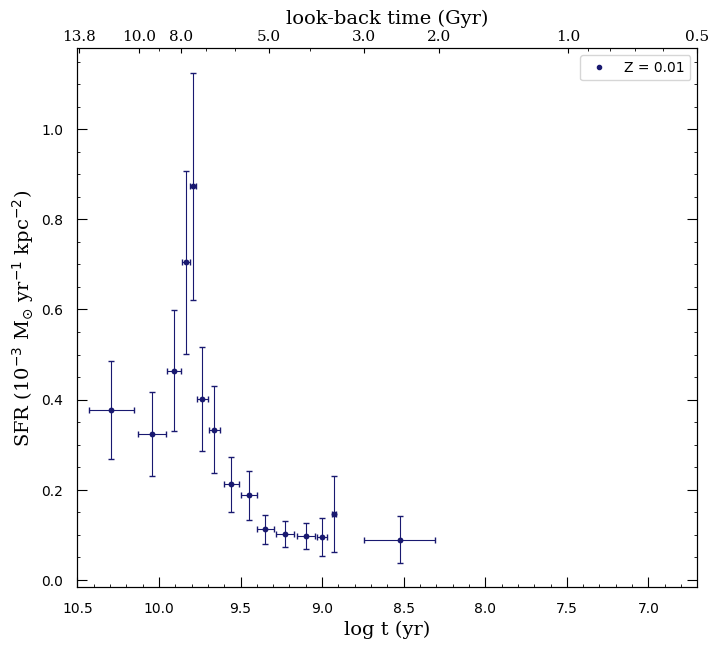

In [84]:
plt.figure(figsize = (8,7), dpi = 100)

plt.xlabel('log t (yr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
plt.ylabel('SFR (10$^{-3}$ M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$)',
           {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})

plt.tick_params(axis='both', which='major', length=7, pad=10, direction='in')
plt.tick_params(axis='y', which='both', left=True, direction='in')
plt.tick_params(axis='x', which='both', bottom=True, direction='in')
plt.tick_params(axis='x', which='both', top=True, direction='in')
plt.tick_params(axis='y', which='both', right=True, direction='in')

plt.minorticks_on()

plt.xlim(10.5,6.7)

plt.plot( SFH_df['Mean log(t)'] , SFH_df['XI'] , '.', color = 'midnightblue', label = 'Z = ' + str(Z))
plt.errorbar(SFH_df['Mean log(t)'], SFH_df['XI'] ,
             SFH_df['XI error'] ,SFH_df['Mean log(t) error'], fmt='.', color='midnightblue', capsize=2.5, linewidth=0.8)

plt.legend()

###########################################
ax2 = plt.twiny()

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlim(13.96,0.575)

ax2.set_xscale('log')

ax2.set_xlabel('look-back time (Gyr)', {'color': 'k', 'fontsize': 14,'fontname':'serif','alpha':1})
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.set_xticks((13.8,10,8,5,3,2,1,0.5))
ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter(useOffset=None, useMathText=None, useLocale=None))
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12,fontname = "serif")
ax2.set_xticklabels(ax2.get_xticks(), fontsize=11,fontname = "serif")

ax2.tick_params(axis='x',which='both',bottom= False,top= True,direction='in')#,color='red',width=5)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
###########################################


# plt.title('Field 1 - Without Using Probability Function', fontsize = 13)
plt.savefig('SFR_Body_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

Saving Data 

In [85]:
SFH_df.to_csv('NGC6822_SFH_Data_Body_'+ Z_name +'.csv', index=False)